In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# === Step 1: Load the CSV ===
file_path = '10_Industry_Portfolios.csv'

# Try skipping the header rows if present
df = pd.read_csv(file_path, skiprows=11)

In [2]:
# Rename first column to 'Date'
df.rename(columns={df.columns[0]: 'Date'}, inplace=True)

In [3]:
df

,Date,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
0,192607,1.44,13.90,4.70,-1.14,2.90,0.83,0.12,1.85,7.04,2.14
1,192608,3.99,3.70,2.80,3.43,2.66,2.17,-0.72,4.17,-1.70,4.35
2,192609,1.15,4.98,1.17,-3.30,-0.39,2.42,0.21,0.69,2.05,0.31
3,192610,-1.24,-8.39,-3.65,-0.78,-4.58,-0.11,-2.29,-0.57,-3.27,-2.85
4,192611,5.21,-0.17,4.27,0.01,4.71,1.63,6.45,5.43,4.40,2.13
...,...,...,...,...,...,...,...,...,...,...,...
5148,2021,0.23,0.18,0.20,0.79,0.12,0.40,0.12,0.16,0.52,0.45
5149,2022,0.22,0.13,0.20,0.55,0.11,0.45,0.10,0.18,0.46,0.41
5150,2023,0.22,0.26,0.22,0.42,0.17,0.60,0.14,0.19,0.47,0.42
5151,2024,0.23,0.39,0.21,0.51,0.11,0.59,0.12,0.17,0.52,0.42


In [4]:
# Clean 'Date' column before datetime conversion
df['Date'] = df['Date'].astype(str).str.strip()  # Remove leading/trailing spaces

# Now safely convert using YYYYMM format
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m', errors='coerce')

# Drop rows where Date couldn't be parsed
df.dropna(subset=['Date'], inplace=True)


In [5]:
# Set Date as index
df.set_index('Date', inplace=True)

# Convert all other columns to numeric (in case of strings)
df = df.apply(pd.to_numeric, errors='coerce')

AverageValueWeightedReturns_Monthly = df.head(1186)
AverageEqualWeightedReturns_Monthly= df.iloc[1186:2372]

In [6]:
AverageValueWeightedReturns_Monthly

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Date,,,,,,,,,,
1926-07-01,1.44,13.90,4.70,-1.14,2.90,0.83,0.12,1.85,7.04,2.14
1926-08-01,3.99,3.70,2.80,3.43,2.66,2.17,-0.72,4.17,-1.70,4.35
1926-09-01,1.15,4.98,1.17,-3.30,-0.39,2.42,0.21,0.69,2.05,0.31
1926-10-01,-1.24,-8.39,-3.65,-0.78,-4.58,-0.11,-2.29,-0.57,-3.27,-2.85
1926-11-01,5.21,-0.17,4.27,0.01,4.71,1.63,6.45,5.43,4.40,2.13
...,...,...,...,...,...,...,...,...,...,...
2024-12-01,-5.04,11.01,-7.81,-8.98,1.43,-7.96,-1.87,-5.38,-7.77,-7.09
2025-01-01,0.66,0.43,3.82,1.43,0.27,1.37,6.73,6.35,2.92,6.32
2025-02-01,5.53,-22.80,-1.85,2.98,-3.94,9.40,-3.74,3.50,2.01,-0.56


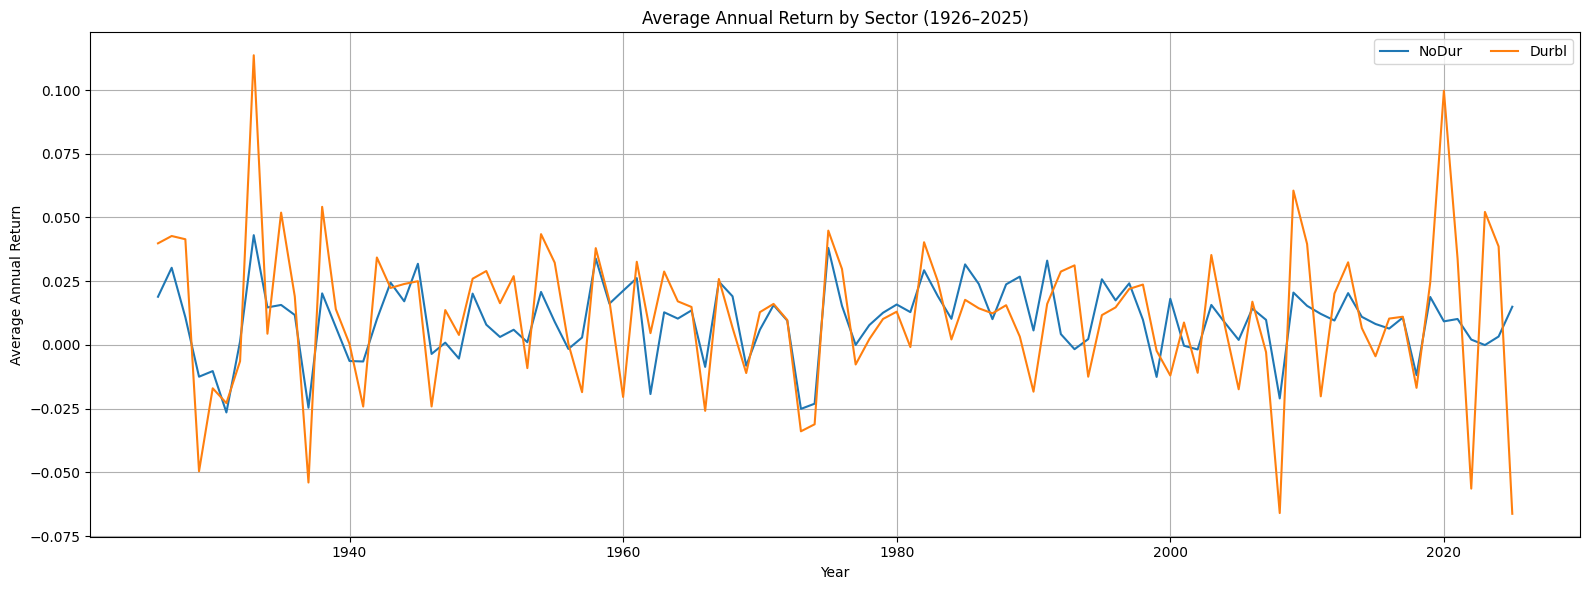

In [7]:
# Convert monthly % returns to decimal (optional: only if needed)
monthly_returns = AverageValueWeightedReturns_Monthly.copy() / 100

# Group by year and calculate mean return per year
annual_avg_returns = monthly_returns.groupby(monthly_returns.index.year).mean()

# Plot all 10 sectors across years
plt.figure(figsize=(16, 6))
plt.plot(annual_avg_returns.index, annual_avg_returns['NoDur'], label='NoDur')
plt.plot(annual_avg_returns.index, annual_avg_returns['Durbl'], label='Durbl')
plt.title('Average Annual Return by Sector (1926–2025)')
plt.xlabel('Year')
plt.ylabel('Average Annual Return')
plt.legend(loc='upper right', ncol=2)
plt.grid(True)
plt.tight_layout()
plt.show()


3 Month using Top3 strategy

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming monthly_returns is already cleaned and contains decimal returns
returns = monthly_returns.copy()

# Step 1: Define momentum window (e.g., trailing 3-month return)
momentum_window = 3

# Step 2: Calculate momentum scores
momentum_scores = returns.rolling(window=momentum_window).sum()

# Step 3: Rank sectors based on momentum
ranks = momentum_scores.rank(axis=1, ascending=False)

# Step 4: Create Top N selection mask (e.g., Top 3 sectors)
top_n = 3
top_n_mask = ranks <= top_n

In [9]:
top_n_mask

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Date,,,,,,,,,,
1926-07-01,False,False,False,False,False,False,False,False,False,False
1926-08-01,False,False,False,False,False,False,False,False,False,False
1926-09-01,False,True,True,False,False,False,False,False,True,False
1926-10-01,True,False,False,False,False,True,False,True,False,False
1926-11-01,True,False,False,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...
2024-12-01,False,True,False,False,True,False,True,False,False,False
2025-01-01,False,True,False,False,False,False,True,False,False,True
2025-02-01,True,False,False,False,False,True,False,True,False,False


In [10]:
# Step 5: Equal-weighted returns of selected sectors
# Where selected, keep return; otherwise set to NaN
selected_returns = returns.where(top_n_mask)

# Equal-weighted average across selected sectors each month
portfolio_returns = selected_returns.mean(axis=1)

# Step 6: Cumulative performance
cumulative_portfolio = (1 + portfolio_returns).cumprod()

# Step 7: Benchmark — equal-weighted of all sectors
benchmark_returns = returns.mean(axis=1)
cumulative_benchmark = (1 + benchmark_returns).cumprod()


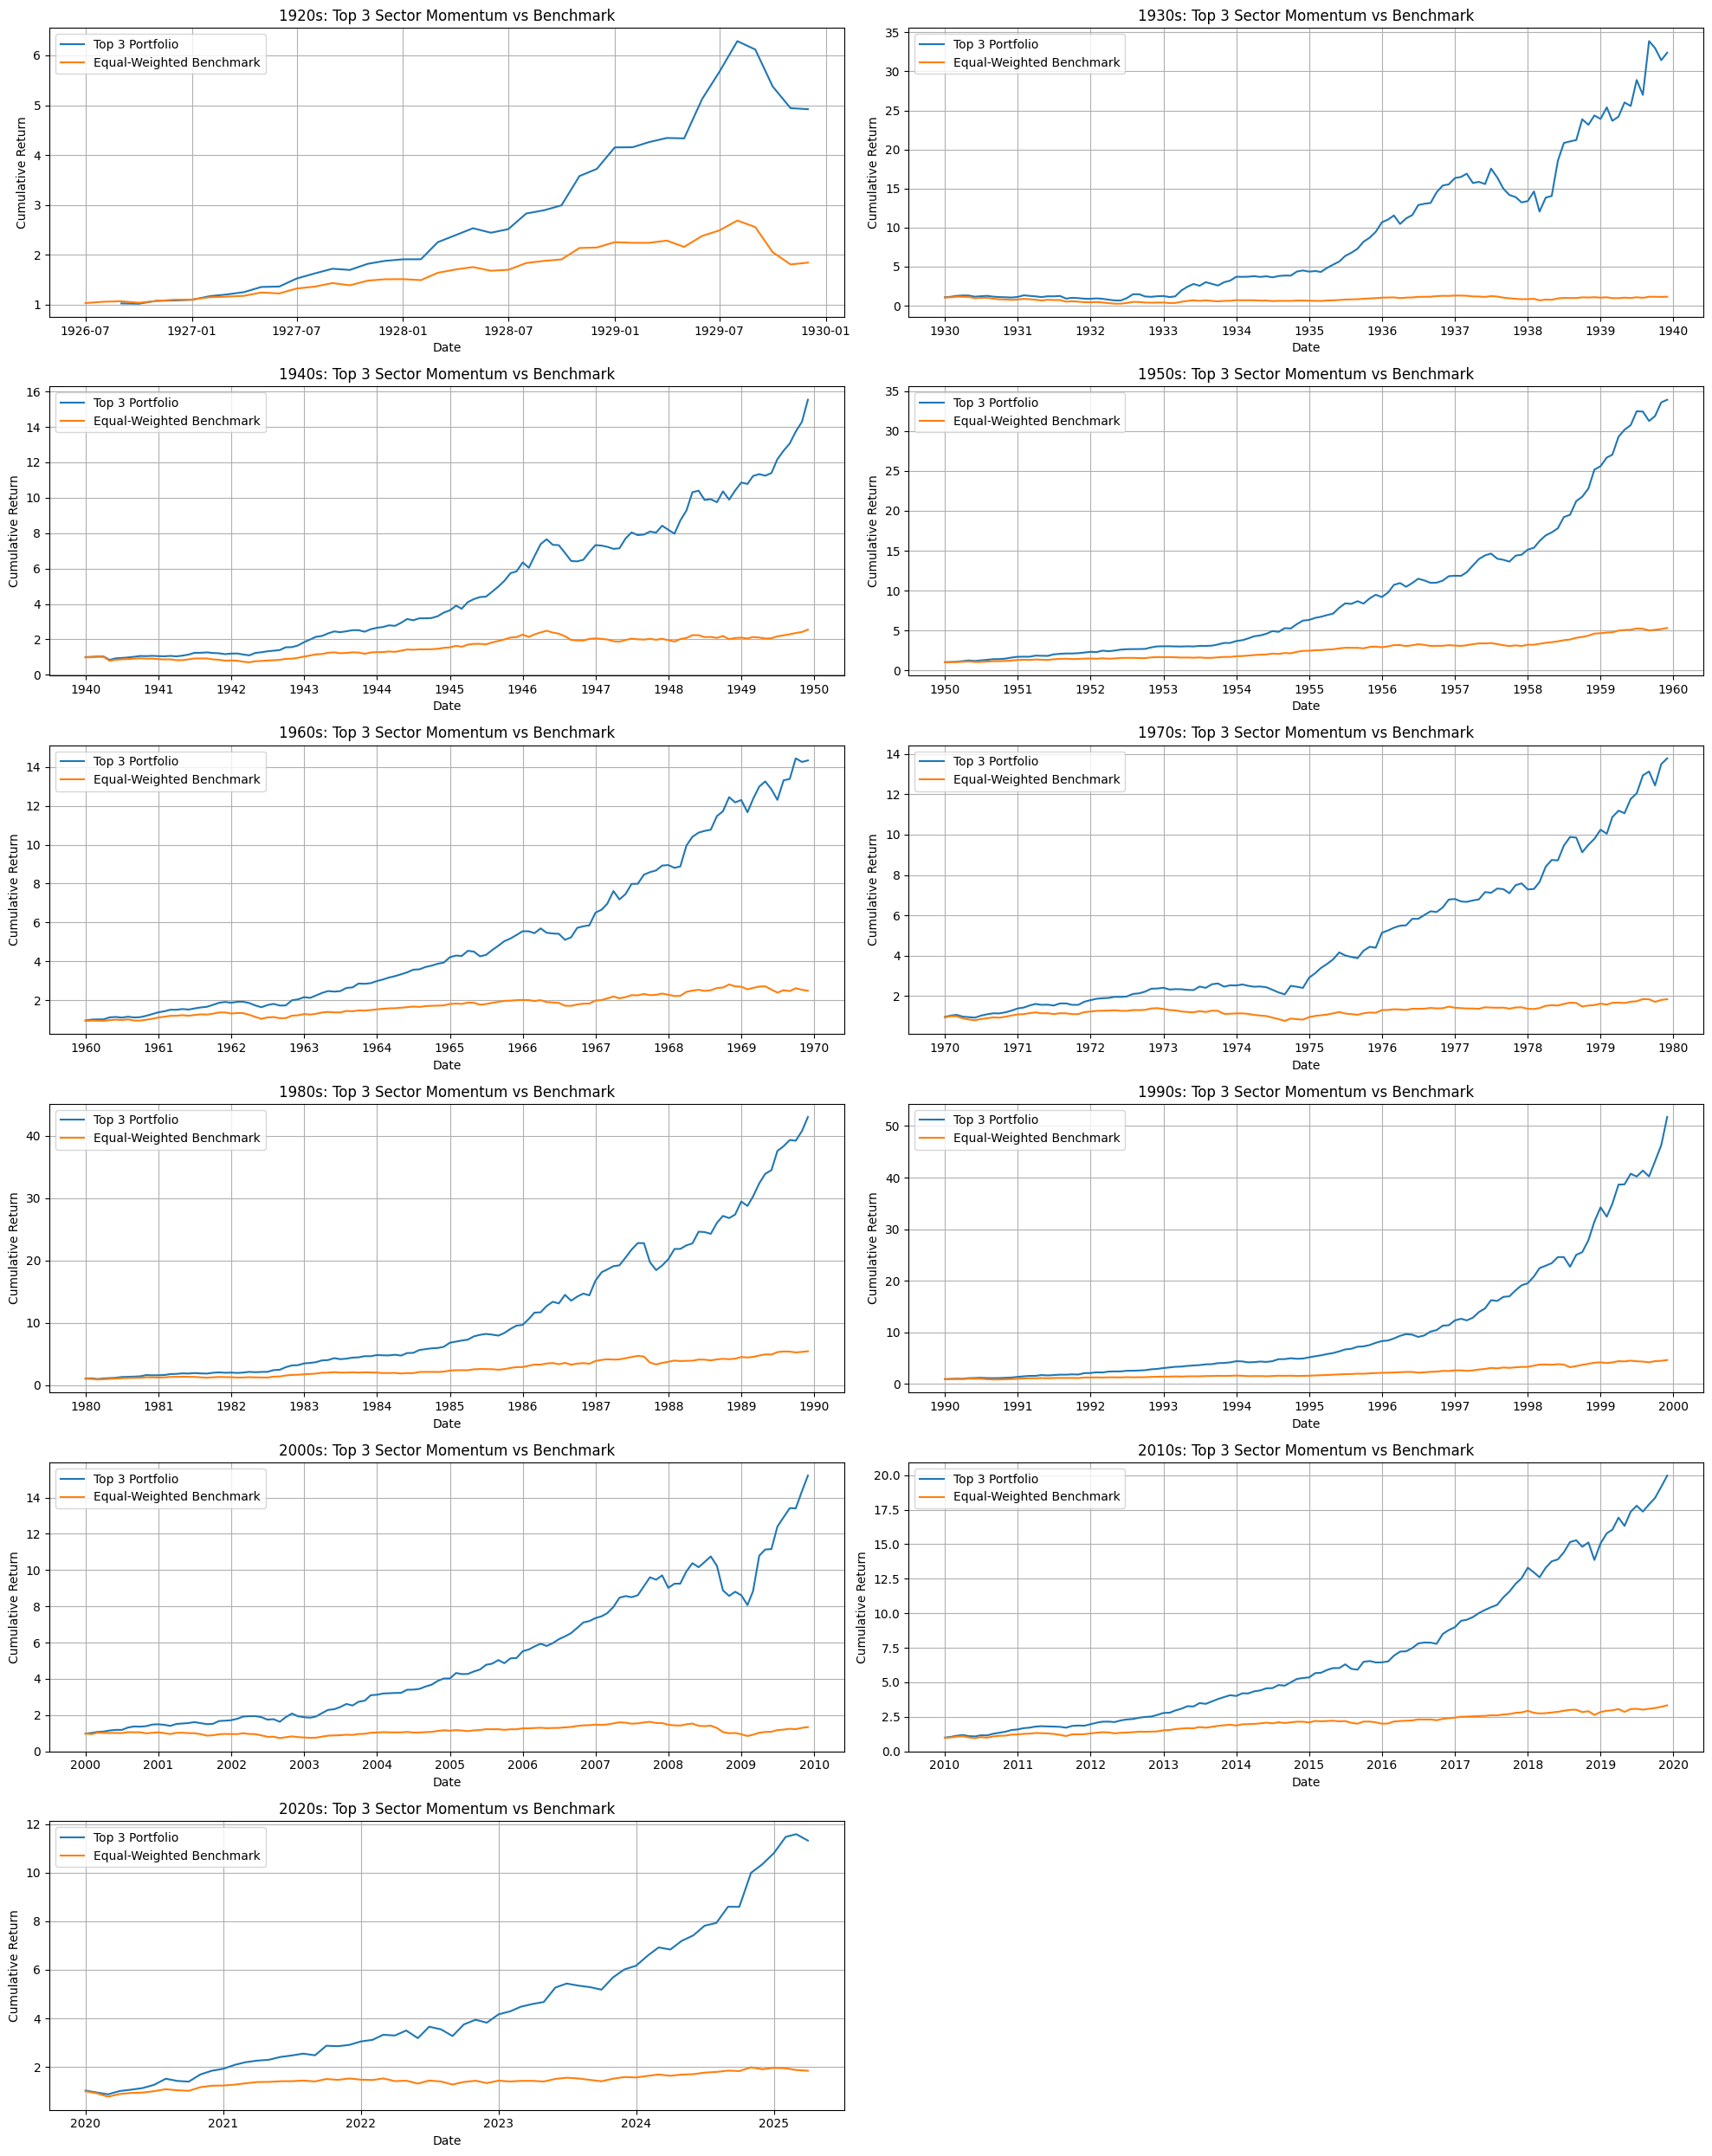

In [11]:
import matplotlib.pyplot as plt

# Define decade ranges
decades = [(1920 + i*10, 1929 + i*10) for i in range(11)]  # 1920s to 2020s

# Plot settings
plt.figure(figsize=(20, 25))
plt.subplots_adjust(hspace=0.5)

for i, (start, end) in enumerate(decades):
    # Create decade string
    label = f"{start}s"

    # Filter date range
    mask = (portfolio_returns.index.year >= start) & (portfolio_returns.index.year <= end)
    portfolio_decade = portfolio_returns.loc[mask]
    benchmark_decade = benchmark_returns.loc[mask]

    # Convert to cumulative returns
    cum_portfolio = (1 + portfolio_decade).cumprod()
    cum_benchmark = (1 + benchmark_decade).cumprod()

    # Plot each subplot
    plt.subplot(6, 2, i + 1)
    plt.plot(cum_portfolio, label=f'Top {top_n} Portfolio')
    plt.plot(cum_benchmark, label='Equal-Weighted Benchmark')
    plt.title(f"{label}: Top {top_n} Sector Momentum vs Benchmark")
    plt.xlabel("Date")
    plt.ylabel("Cumulative Return")
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()


In [12]:
returns = monthly_returns.copy()

In [13]:
returns = returns.loc['1926-07-01':'2009-12-01']

# === Step 2: Metric functions ===
def calculate_cagr_from_cum(cum_series):
    start = cum_series.iloc[0]
    end = cum_series.iloc[-1]
    n_years = len(cum_series) / 12
    return (end / start) ** (1 / n_years) - 1

def calculate_volatility(returns):
    return returns.std() * np.sqrt(12)

def calculate_sharpe(returns, risk_free_rate=0.0381):
    excess = returns - (risk_free_rate / 12)
    return (excess.mean() / returns.std()) * np.sqrt(12)

def calculate_max_drawdown(cumulative_returns):
    peak = cumulative_returns.cummax()
    drawdown = (cumulative_returns - peak) / peak
    return drawdown.min()

def calculate_win_ratio(returns):
    return (returns > 0).mean()

# === Step 3: Strategy logic using lagged momentum signal ===
def compute_top_n_strategy(returns, top_n):
    strategy_returns = []

    for i in range(12, len(returns) - 1):
        # Lagged combined momentum score at t
        momentum = (
            returns.iloc[i-1] +
            returns.iloc[i-3] +
            returns.iloc[i-6] +
            returns.iloc[i-9] +
            returns.iloc[i-12]
        )
        top_assets = momentum.nlargest(top_n).index
        next_return = returns.iloc[i + 1][top_assets].mean()
        strategy_returns.append(next_return)

    index = returns.index[13:len(strategy_returns) + 13]
    return pd.Series(strategy_returns, index=index)

# === Step 4: Equal-weighted benchmark ===
equal_returns = monthly_returns.mean(axis=1)
equal_returns = equal_returns.loc['1927-08-01':'2009-12-01']  # align with strategy start

# === Step 5: Run strategies and collect metrics ===
metrics = []

for top_n in range(1, 10):
    strat_returns = compute_top_n_strategy(monthly_returns, top_n)
    cumulative = (1 + strat_returns).cumprod()

    metrics.append({
        "Strategy": f"Top {top_n}",
        "CAGR": calculate_cagr_from_cum(cumulative),
        "Volatility": calculate_volatility(strat_returns),
        "Sharpe Ratio": calculate_sharpe(strat_returns),
        "Max Drawdown": calculate_max_drawdown(cumulative),
        "Win Ratio": calculate_win_ratio(strat_returns)
    })

# Add equal-weighted
equal_cumulative = (1 + equal_returns).cumprod()

metrics.append({
    "Strategy": "Equal Weighted",
    "CAGR": calculate_cagr_from_cum(equal_cumulative),
    "Volatility": calculate_volatility(equal_returns),
    "Sharpe Ratio": calculate_sharpe(equal_returns),
    "Max Drawdown": calculate_max_drawdown(equal_cumulative),
    "Win Ratio": calculate_win_ratio(equal_returns)
})

# === Step 6: Results Table ===
metrics_df = pd.DataFrame(metrics).set_index("Strategy")
pd.options.display.float_format = '{:,.2%}'.format
print(metrics_df)



                 CAGR  Volatility  Sharpe Ratio  Max Drawdown  Win Ratio
Strategy                                                                
Top 1          11.06%      23.03%        40.56%       -81.33%     58.31%
Top 2          11.76%      19.90%        47.11%       -82.64%     60.61%
Top 3          12.17%      18.96%        50.53%       -81.76%     62.15%
Top 4          12.18%      18.38%        51.51%       -79.69%     62.49%
Top 5          11.83%      18.01%        50.46%       -79.31%     63.34%
Top 6          11.45%      17.83%        48.82%       -79.56%     63.09%
Top 7          11.11%      17.74%        47.27%       -79.41%     63.17%
Top 8          10.82%      17.72%        45.82%       -81.22%     63.17%
Top 9          10.69%      17.75%        45.02%       -81.36%     63.17%
Equal Weighted 10.33%      18.47%        42.17%       -81.91%     62.18%


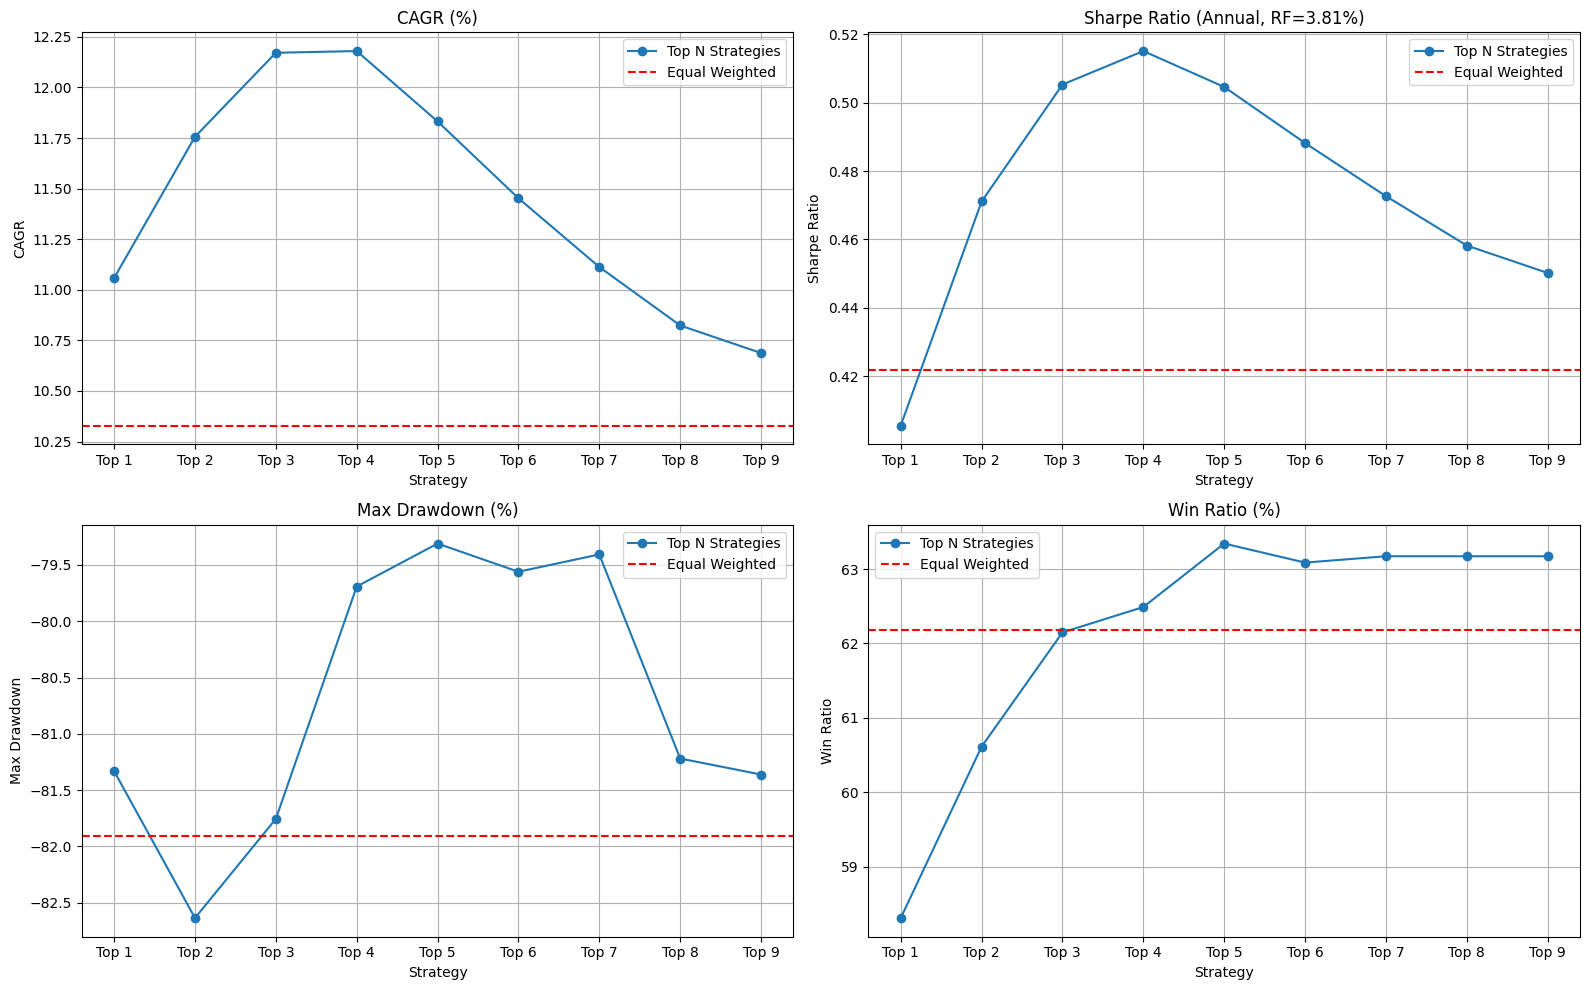

In [14]:
# Prepare data
metrics_df_numeric = metrics_df.copy()
metrics_df_numeric[['CAGR', 'Max Drawdown', 'Win Ratio']] *= 100  # Convert to %
metrics_df_numeric = metrics_df_numeric.reset_index()

# Separate Top N vs Equal-Weighted
topn_metrics = metrics_df_numeric[metrics_df_numeric['Strategy'].str.contains("Top")]
eq_metrics = metrics_df_numeric[metrics_df_numeric['Strategy'] == 'Equal Weighted']

# Plot settings
metrics_to_plot = ['CAGR', 'Sharpe Ratio', 'Max Drawdown', 'Win Ratio']
titles = {
    'CAGR': "CAGR (%)",
    'Sharpe Ratio': "Sharpe Ratio (Annual, RF=3.81%)",
    'Max Drawdown': "Max Drawdown (%)",
    'Win Ratio': "Win Ratio (%)"
}

# Plot
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

for i, metric in enumerate(metrics_to_plot):
    ax = axes[i]
    ax.plot(topn_metrics['Strategy'], topn_metrics[metric], marker='o', label='Top N Strategies')
    ax.axhline(y=eq_metrics[metric].values[0], color='r', linestyle='--', label='Equal Weighted')
    ax.set_title(titles[metric])
    ax.set_xlabel('Strategy')
    ax.set_ylabel(metric)
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()


In [15]:
# Rebuild Top N strategies using lagged momentum
top1_returns = compute_top_n_strategy(monthly_returns, top_n=1)
top2_returns = compute_top_n_strategy(monthly_returns, top_n=2)
top3_returns = compute_top_n_strategy(monthly_returns, top_n=3)

# Align equal-weighted benchmark to same timeline
equal_returns = monthly_returns.mean(axis=1)
equal_returns = equal_returns.loc[top1_returns.index]  # align index


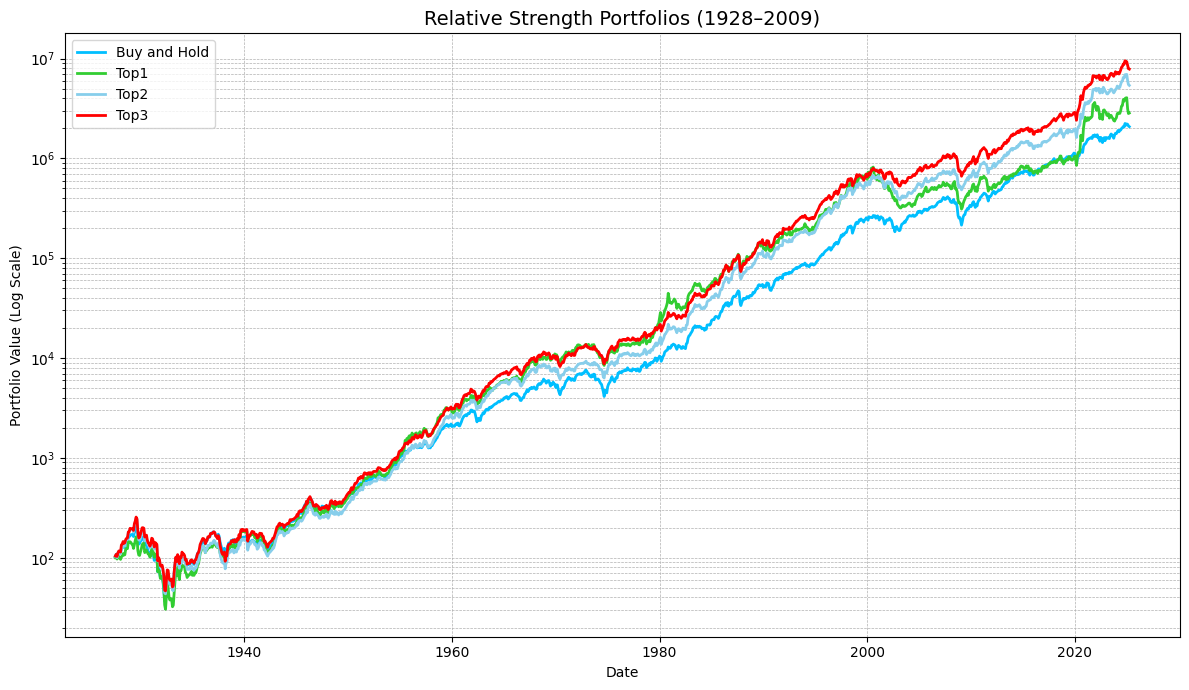

In [16]:
# Start with $100
initial_investment = 100

# Compute cumulative growth of $100
cum_top1 = (1 + top1_returns).cumprod() * initial_investment
cum_top2 = (1 + top2_returns).cumprod() * initial_investment
cum_top3 = (1 + top3_returns).cumprod() * initial_investment
cum_equal = (1 + equal_returns).cumprod() * initial_investment

# Plot on log scale
plt.figure(figsize=(12, 7))
plt.plot(cum_equal, label='Buy and Hold', color='deepskyblue', linewidth=2)
plt.plot(cum_top1, label='Top1', color='limegreen', linewidth=2)
plt.plot(cum_top2, label='Top2', color='skyblue', linewidth=2)
plt.plot(cum_top3, label='Top3', color='red', linewidth=2)

plt.title("Relative Strength Portfolios (1928–2009)", fontsize=14)
plt.ylabel("Portfolio Value (Log Scale)")
plt.xlabel("Date")
plt.yscale("log")
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()


                 CAGR  Volatility  Sharpe Ratio  Max Drawdown  Win Ratio
Strategy                                                                
Top 1          11.17%      26.62%        37.42%       -34.93%     54.97%
Top 2          13.52%      19.13%        56.17%       -22.71%     62.57%
Top 3          13.83%      16.92%        63.90%       -22.23%     61.40%
Equal Weighted 11.72%      14.73%        58.65%       -22.92%     66.67%


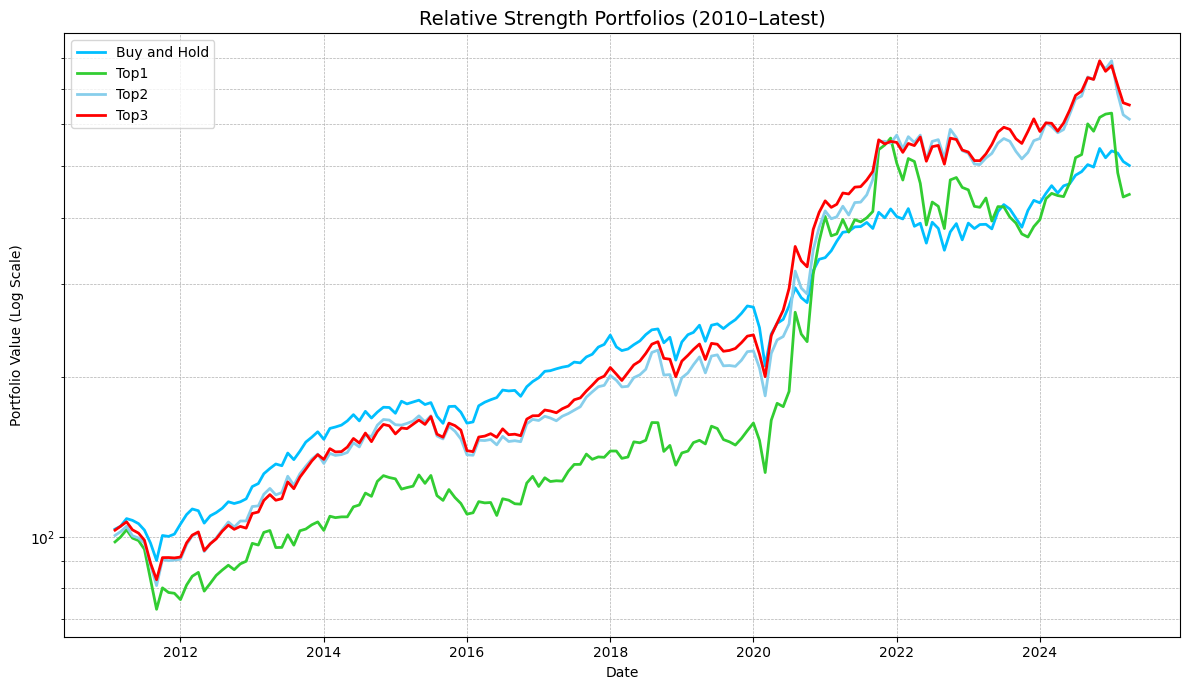

In [17]:
returns_present = monthly_returns.copy()
returns_present = returns_present.loc['2010-01-01':]  # restrict to 2010+

# === Step 2: Define metric and strategy functions ===
def calculate_cagr_from_cum(cum_series):
    start = cum_series.iloc[0]
    end = cum_series.iloc[-1]
    n_years = len(cum_series) / 12
    return (end / start) ** (1 / n_years) - 1

def calculate_volatility(returns):
    return returns.std() * np.sqrt(12)

def calculate_sharpe(returns, risk_free_rate=0.0381):
    excess = returns - (risk_free_rate / 12)
    return (excess.mean() / returns.std()) * np.sqrt(12)

def calculate_max_drawdown(cumulative_returns):
    peak = cumulative_returns.cummax()
    drawdown = (cumulative_returns - peak) / peak
    return drawdown.min()

def calculate_win_ratio(returns):
    return (returns > 0).mean()

def compute_top_n_strategy(returns, top_n):
    strategy_returns = []
    for i in range(12, len(returns) - 1):
        momentum = (
            returns.iloc[i-1] +
            returns.iloc[i-3] +
            returns.iloc[i-6] +
            returns.iloc[i-9] +
            returns.iloc[i-12]
        )
        top_assets = momentum.nlargest(top_n).index
        next_return = returns.iloc[i + 1][top_assets].mean()
        strategy_returns.append(next_return)
    index = returns.index[13:len(strategy_returns) + 13]
    return pd.Series(strategy_returns, index=index)

# === Step 3: Build Top N and Equal-Weighted portfolios ===
top1_returns = compute_top_n_strategy(returns_present, top_n=1)
top2_returns = compute_top_n_strategy(returns_present, top_n=2)
top3_returns = compute_top_n_strategy(returns_present, top_n=3)
equal_returns = returns_present.mean(axis=1)
equal_returns = equal_returns.loc[top1_returns.index]  # align index

# === Step 4: Compute cumulative returns ===
initial = 100
cum_top1 = (1 + top1_returns).cumprod() * initial
cum_top2 = (1 + top2_returns).cumprod() * initial
cum_top3 = (1 + top3_returns).cumprod() * initial
cum_equal = (1 + equal_returns).cumprod() * initial

# === Step 5: Calculate performance metrics ===
def compute_metrics(name, returns, cum_returns):
    return {
        "Strategy": name,
        "CAGR": calculate_cagr_from_cum(cum_returns),
        "Volatility": calculate_volatility(returns),
        "Sharpe Ratio": calculate_sharpe(returns),
        "Max Drawdown": calculate_max_drawdown(cum_returns),
        "Win Ratio": calculate_win_ratio(returns)
    }

metrics = [
    compute_metrics("Top 1", top1_returns, cum_top1),
    compute_metrics("Top 2", top2_returns, cum_top2),
    compute_metrics("Top 3", top3_returns, cum_top3),
    compute_metrics("Equal Weighted", equal_returns, cum_equal)
]
metrics_df = pd.DataFrame(metrics).set_index("Strategy")
pd.options.display.float_format = '{:,.2%}'.format
print(metrics_df)

# === Step 6: Plot cumulative log-scale chart ===
plt.figure(figsize=(12, 7))
plt.plot(cum_equal, label='Buy and Hold', color='deepskyblue', linewidth=2)
plt.plot(cum_top1, label='Top1', color='limegreen', linewidth=2)
plt.plot(cum_top2, label='Top2', color='skyblue', linewidth=2)
plt.plot(cum_top3, label='Top3', color='red', linewidth=2)

plt.title("Relative Strength Portfolios (2010–Latest)", fontsize=14)
plt.ylabel("Portfolio Value (Log Scale)")
plt.xlabel("Date")
plt.yscale("log")
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()


                 CAGR  Volatility  Sharpe Ratio  Max Drawdown  Win Ratio
Strategy                                                                
Top 3 Unhedged 13.83%      16.92%        63.90%       -22.23%     61.40%
Top 3 Hedged   10.61%      14.18%        52.88%       -19.25%     52.63%
Equal Weighted 11.72%      14.73%        58.65%       -22.92%     66.67%


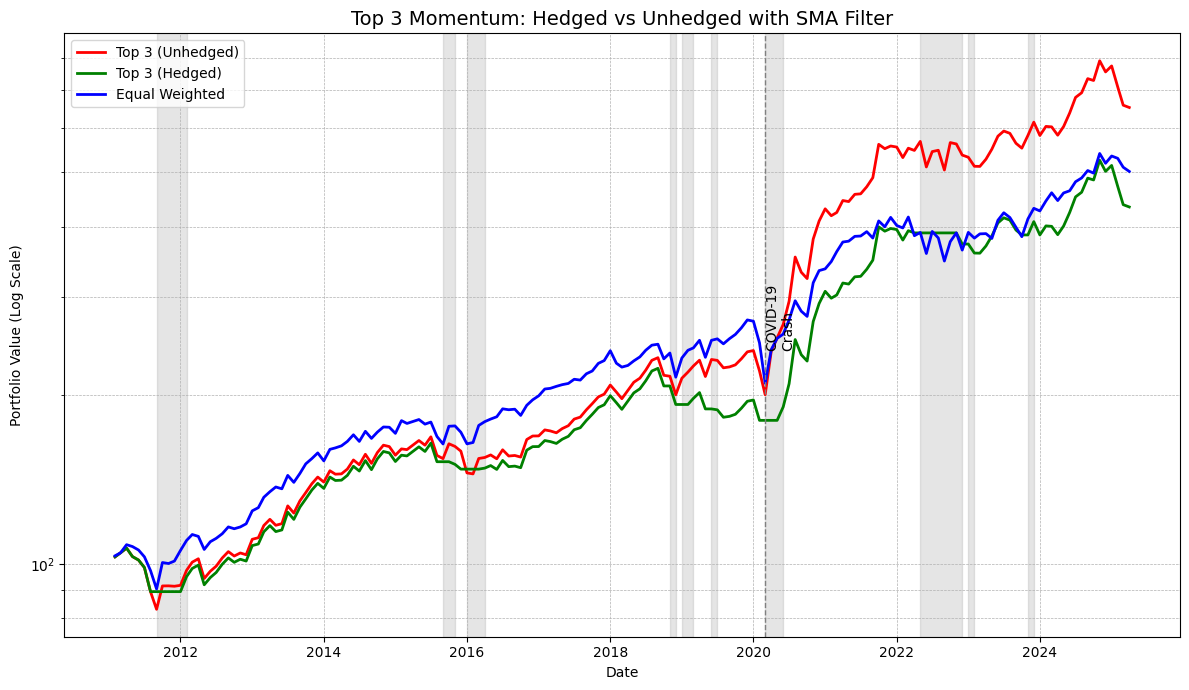

In [18]:
# Equal-weighted benchmark and cumulative value
equal_returns = returns_present.mean(axis=1)
benchmark = (1 + equal_returns).cumprod()

# === Step 2: Strategy functions ===
def compute_top_n_strategy(returns, top_n):
    strategy_returns = []
    for i in range(12, len(returns) - 1):
        momentum = (
            returns.iloc[i-1] +
            returns.iloc[i-3] +
            returns.iloc[i-6] +
            returns.iloc[i-9] +
            returns.iloc[i-12]
        )
        top_assets = momentum.nlargest(top_n).index
        next_return = returns.iloc[i + 1][top_assets].mean()
        strategy_returns.append(next_return)
    index = returns.index[13:len(strategy_returns) + 13]
    return pd.Series(strategy_returns, index=index)

def compute_top_n_strategy_with_sma(returns, top_n, benchmark, sma_months=10):
    strategy_returns = []
    benchmark_sma = benchmark.rolling(window=sma_months).mean()

    for i in range(12, len(returns) - 1):
        if benchmark.iloc[i] > benchmark_sma.iloc[i]:
            momentum = (
                returns.iloc[i-1] +
                returns.iloc[i-3] +
                returns.iloc[i-6] +
                returns.iloc[i-9] +
                returns.iloc[i-12]
            )
            top_assets = momentum.nlargest(top_n).index
            next_return = returns.iloc[i + 1][top_assets].mean()
        else:
            next_return = 0.0  # Cash during downtrend
        strategy_returns.append(next_return)

    index = returns.index[13:len(strategy_returns) + 13]
    return pd.Series(strategy_returns, index=index)

# === Step 3: Compute return series ===
top3_unhedged = compute_top_n_strategy(returns_present, top_n=3)
top3_hedged = compute_top_n_strategy_with_sma(returns_present, top_n=3, benchmark=benchmark)

equal_returns = equal_returns.loc[top3_unhedged.index]  # align
cum_top3 = (1 + top3_unhedged).cumprod() * 100
cum_top3_hedged = (1 + top3_hedged).cumprod() * 100
cum_equal = (1 + equal_returns).cumprod() * 100

# === Step 4: Metrics ===
def calculate_cagr_from_cum(cum_series):
    return (cum_series.iloc[-1] / cum_series.iloc[0]) ** (1 / (len(cum_series)/12)) - 1

def calculate_volatility(returns):
    return returns.std() * np.sqrt(12)

def calculate_sharpe(returns, risk_free_rate=0.0381):
    excess = returns - (risk_free_rate / 12)
    return (excess.mean() / returns.std()) * np.sqrt(12)

def calculate_max_drawdown(cumulative_returns):
    peak = cumulative_returns.cummax()
    return ((cumulative_returns - peak) / peak).min()

def calculate_win_ratio(returns):
    return (returns > 0).mean()

strategies = {
    "Top 3 Unhedged": (top3_unhedged, cum_top3),
    "Top 3 Hedged": (top3_hedged, cum_top3_hedged),
    "Equal Weighted": (equal_returns, cum_equal)
}

metrics = []
for name, (rets, cum) in strategies.items():
    metrics.append({
        "Strategy": name,
        "CAGR": calculate_cagr_from_cum(cum),
        "Volatility": calculate_volatility(rets),
        "Sharpe Ratio": calculate_sharpe(rets),
        "Max Drawdown": calculate_max_drawdown(cum),
        "Win Ratio": calculate_win_ratio(rets)
    })

metrics_df = pd.DataFrame(metrics).set_index("Strategy")
pd.options.display.float_format = "{:.2%}".format
print(metrics_df)

# === Step 5: Hedge periods for shading ===
benchmark_sma = benchmark.rolling(window=10).mean()
hedge_mask = benchmark.shift(1) <= benchmark_sma.shift(1)
hedge_periods = hedge_mask.loc[top3_hedged.index]

# === Step 6: Plot cumulative chart with hedge zones ===
plt.figure(figsize=(12, 7))
plt.plot(cum_top3, label='Top 3 (Unhedged)', color='red', linewidth=2)
plt.plot(cum_top3_hedged, label='Top 3 (Hedged)', color='green', linewidth=2)
plt.plot(cum_equal, label='Equal Weighted', color='blue', linewidth=2)

# Shade in-cash (hedged) periods
in_cash = False
start = None
for i in range(1, len(hedge_periods)):
    if hedge_periods.iloc[i] and not hedge_periods.iloc[i - 1]:
        start = hedge_periods.index[i]
        in_cash = True
    elif not hedge_periods.iloc[i] and hedge_periods.iloc[i - 1] and in_cash:
        end = hedge_periods.index[i]
        plt.axvspan(start, end, color='gray', alpha=0.2)
        in_cash = False

# Mark COVID crash
plt.axvline(pd.to_datetime('2020-03-01'), color='gray', linestyle='--', linewidth=1)
plt.text(pd.to_datetime('2020-03-01'), plt.ylim()[1]/3, 'COVID-19\nCrash', rotation=90, verticalalignment='center')

plt.title("Top 3 Momentum: Hedged vs Unhedged with SMA Filter", fontsize=14)
plt.ylabel("Portfolio Value (Log Scale)")
plt.xlabel("Date")
plt.yscale("log")
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()


In [19]:
import yfinance as yf
import pandas as pd

# === Step 1: Define tickers ===
tickers = ['SPY', 'EFA', 'TLT', 'DBC','VNQ']

# === Step 2: Download data ===
# With auto_adjust=True, prices are already adjusted; no need to extract 'Adj Close'
prices = yf.download(tickers, start='2006-03-01', interval='1mo', progress=False)

# === Step 3: Clean & reshape if needed ===
# If multi-level columns (e.g., Open, High, Close), get 'Adj Close' or fallback to Close
if isinstance(prices.columns, pd.MultiIndex):
    if 'Adj Close' in prices.columns.levels[0]:
        prices = prices['Adj Close']
    else:
        prices = prices['Close']  # fallback

# === Step 4: Drop missing values and calculate monthly returns ===
prices = prices.dropna(how='all')  # remove rows with all NaNs
monthly_returns_global = prices.pct_change().dropna()



<ipython-input-19-600988466>:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  prices = yf.download(tickers, start='2006-03-01', interval='1mo', progress=False)
<ipython-input-19-600988466>:21: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  monthly_returns_global = prices.pct_change().dropna()


In [20]:
monthly_returns_global.describe()

Ticker,DBC,EFA,SPY,TLT,VNQ
count,23100.00%,23100.00%,23100.00%,23100.00%,23100.00%
mean,0.22%,0.51%,0.93%,0.34%,0.69%
std,5.44%,5.11%,4.59%,4.06%,6.56%
min,-25.08%,-20.83%,-24.38%,-12.49%,-30.84%
25%,-2.97%,-2.85%,-1.48%,-2.34%,-2.80%
50%,-0.01%,0.81%,1.48%,0.24%,1.13%
75%,4.13%,3.60%,3.41%,2.47%,4.42%
max,16.27%,14.27%,13.36%,14.23%,33.27%


In [21]:

# === Step 2: Metric functions ===
def calculate_cagr_from_returns(returns):
    n_months = len(returns)
    total_return = (1 + returns).prod()
    years = n_months / 12
    return total_return ** (1 / years) - 1

def calculate_volatility(returns):
    return returns.std() * np.sqrt(12)

def calculate_sharpe(returns, risk_free_rate=0.059):
    excess = returns - (risk_free_rate / 12)
    return (excess.mean() / returns.std()) * np.sqrt(12)

def calculate_max_drawdown(cumulative_returns):
    peak = cumulative_returns.cummax()
    drawdown = (cumulative_returns - peak) / peak
    return drawdown.min()

# === Step 3: Compute metrics per asset ===
metrics = []
for col in monthly_returns_global.columns:
    rets = monthly_returns_global[col]
    cum = (1 + rets).cumprod()
    metrics.append({
        "Strategy": col,
        "CAGR": calculate_cagr_from_returns(rets),
        "STDEV": calculate_volatility(rets),
        "Sharpe Ratio": calculate_sharpe(rets),
        "Max Drawdown": calculate_max_drawdown(cum)
    })

# === Step 4: Add Buy & Hold (equal-weighted) ===
equal_returns = monthly_returns_global.mean(axis=1)
equal_cum = (1 + equal_returns).cumprod()
metrics.append({
    "Strategy": "BUY & HOLD",
    "CAGR": calculate_cagr_from_returns(equal_returns),
    "STDEV": calculate_volatility(equal_returns),
    "Sharpe Ratio": calculate_sharpe(equal_returns),
    "Max Drawdown": calculate_max_drawdown(equal_cum)
})

# === Step 5: Show table ===
metrics_df = pd.DataFrame(metrics).set_index("Strategy")
pd.options.display.float_format = "{:.2%}".format
display(metrics_df)


,CAGR,STDEV,Sharpe Ratio,Max Drawdown
Strategy,,,,
DBC,0.85%,18.86%,-17.17%,-74.55%
EFA,4.58%,17.70%,0.93%,-57.37%
SPY,10.31%,15.90%,32.97%,-50.78%
TLT,3.16%,14.07%,-12.88%,-47.72%
VNQ,5.80%,22.72%,10.50%,-68.30%
BUY & HOLD,5.78%,12.64%,4.34%,-42.77%


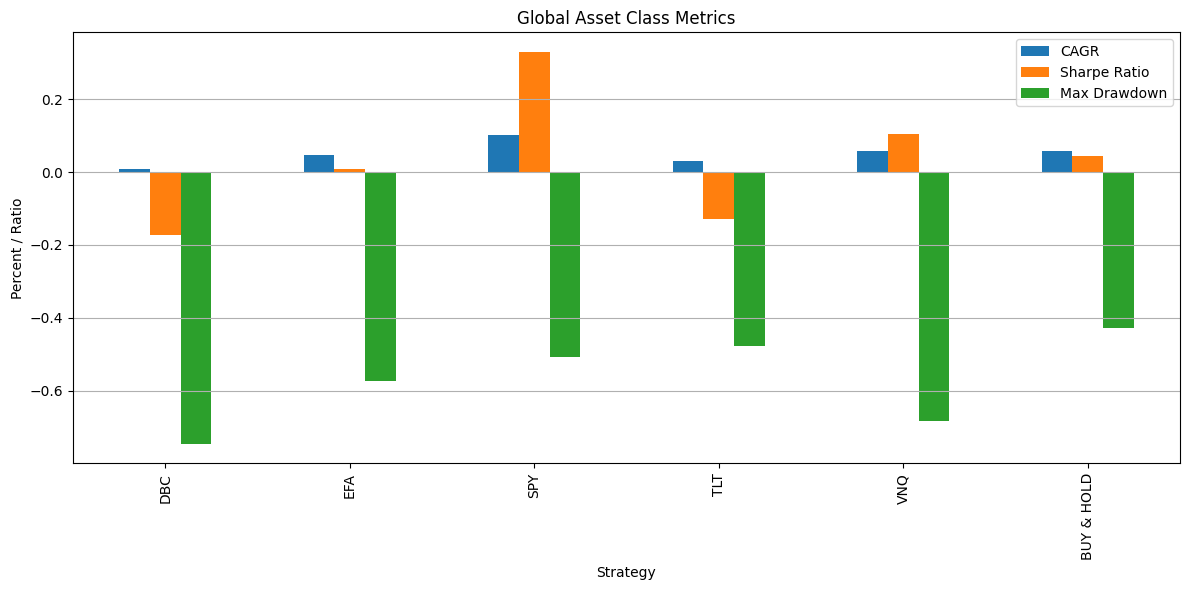

In [22]:
metrics_df[["CAGR", "Sharpe Ratio", "Max Drawdown"]].plot(kind='bar', figsize=(12, 6), title="Global Asset Class Metrics")
plt.grid(True, axis='y')
plt.ylabel("Percent / Ratio")
plt.tight_layout()
plt.show()


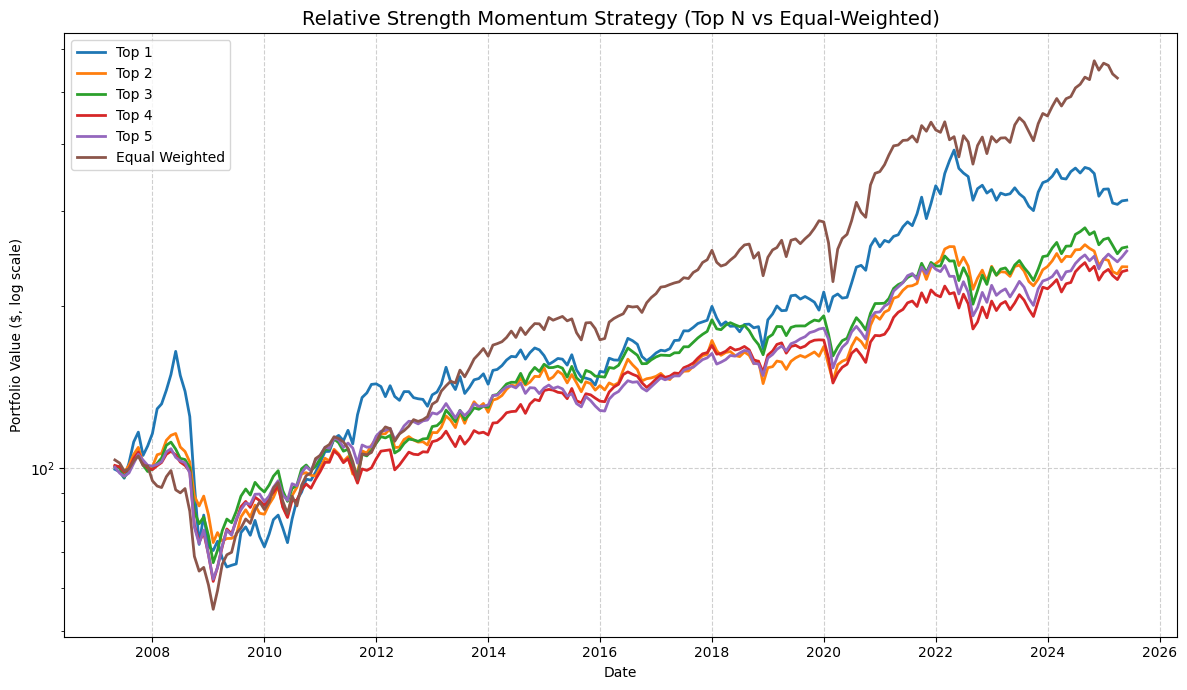

In [23]:
# Step 1: Compute momentum score
def compute_momentum_scores(returns, lookback_months=[1, 3, 6, 9, 12]):
    scores = sum([returns.shift(m) for m in lookback_months])
    return scores

# Step 2: Build Top N RS strategy
def compute_top_n_strategy(returns, top_n):
    momentum_scores = compute_momentum_scores(returns)
    strategy_returns = []

    for i in range(12, len(returns) - 1):
        scores = momentum_scores.iloc[i]
        top_assets = scores.nlargest(top_n).index
        next_month_return = returns.iloc[i + 1][top_assets].mean()
        strategy_returns.append(next_month_return)

    index = returns.index[13:13 + len(strategy_returns)]
    return pd.Series(strategy_returns, index=index)

# Step 3: Compute for all Top N
strategy_results = {}
for n in range(1, 6):  # Top 1 to Top 5
    strategy_results[f"Top {n}"] = compute_top_n_strategy(monthly_returns_global, top_n=n)

# Step 4: Compute Buy & Hold (equal-weighted baseline)
equal_returns = monthly_returns.mean(axis=1)
equal_returns = equal_returns.reindex(strategy_results['Top 1'].index)
  # align index
strategy_results["Equal Weighted"] = equal_returns

# Step 5: Compute cumulative returns
cum_returns = {name: (1 + rets).cumprod() * 100 for name, rets in strategy_results.items()}

# Step 6: Plot cumulative returns
plt.figure(figsize=(12, 7))
for name, series in cum_returns.items():
    plt.plot(series, label=name, linewidth=2)
plt.title("Relative Strength Momentum Strategy (Top N vs Equal-Weighted)", fontsize=14)
plt.yscale("log")
plt.xlabel("Date")
plt.ylabel("Portfolio Value ($, log scale)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


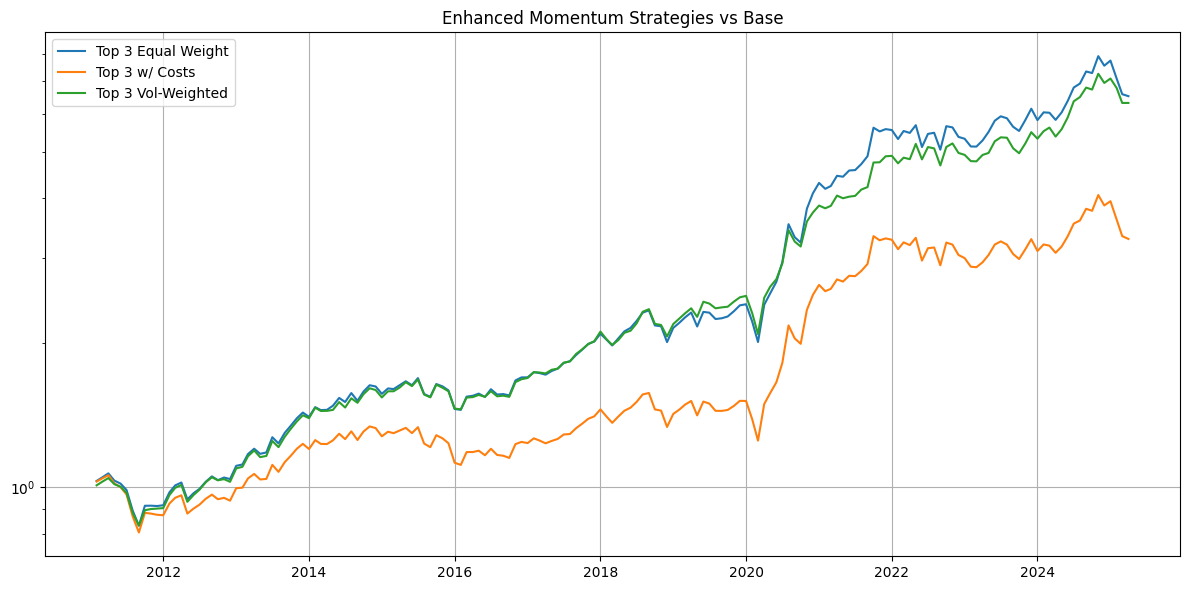

In [24]:
def compute_top_n_strategy_with_costs(returns, top_n, cost_per_trade=0.001):
    momentum_scores = compute_momentum_scores(returns)
    strategy_returns = []
    prev_holdings = set()

    for i in range(12, len(returns) - 1):
        # Rank by momentum
        scores = momentum_scores.iloc[i]
        top_assets = set(scores.nlargest(top_n).index)

        # Return of next month
        next_return = returns.iloc[i + 1][list(top_assets)].mean()

        # Estimate trading cost
        turnover = len(top_assets.symmetric_difference(prev_holdings))  # changes
        total_cost = turnover * cost_per_trade

        # Subtract cost from return
        strategy_returns.append(next_return - total_cost)
        prev_holdings = top_assets

    index = returns.index[13:13 + len(strategy_returns)]
    return pd.Series(strategy_returns, index=index)

def compute_top_n_vol_weighted(returns, top_n, vol_lookback=3):
    momentum_scores = compute_momentum_scores(returns)
    strategy_returns = []

    for i in range(12, len(returns) - 1):
        scores = momentum_scores.iloc[i]
        top_assets = scores.nlargest(top_n).index

        # Compute inverse volatility weights
        vol = returns[top_assets].iloc[i-vol_lookback:i].std()
        inv_vol = 1 / vol
        weights = inv_vol / inv_vol.sum()

        next_rets = returns.iloc[i + 1][top_assets]
        weighted_return = (next_rets * weights).sum()
        strategy_returns.append(weighted_return)

    index = returns.index[13:13 + len(strategy_returns)]
    return pd.Series(strategy_returns, index=index)
top3_with_costs = compute_top_n_strategy_with_costs(returns_present, top_n=3)
top3_vol_weighted = compute_top_n_vol_weighted(returns_present, top_n=3)

plt.figure(figsize=(12,6))
plt.plot((1 + top3_unhedged).cumprod(), label="Top 3 Equal Weight")
plt.plot((1 + top3_with_costs).cumprod(), label="Top 3 w/ Costs")
plt.plot((1 + top3_vol_weighted).cumprod(), label="Top 3 Vol-Weighted")
plt.yscale("log")
plt.legend()
plt.title("Enhanced Momentum Strategies vs Base")
plt.grid(True)
plt.tight_layout()
plt.show()


Machine Learning Based Approach

[*********************100%***********************]  5 of 5 completed
<ipython-input-25-1044192856>:15: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = prices.pct_change().dropna()



Performance Metrics:



<ipython-input-25-1044192856>:83: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_selected = grouped.apply(lambda x: x.nlargest(top_n, 'alpha')).reset_index(drop=True)
<ipython-input-25-1044192856>:114: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  metrics_df = metrics_df.applymap(lambda x: f"{x:.2%}" if isinstance(x, float) else x)


,CAGR,Volatility,Sharpe Ratio,Max Drawdown,Win Ratio
ML Alpha,8.94%,11.39%,81.11%,-21.74%,60.76%
Equal Weighted,5.65%,10.88%,56.12%,-19.73%,63.92%


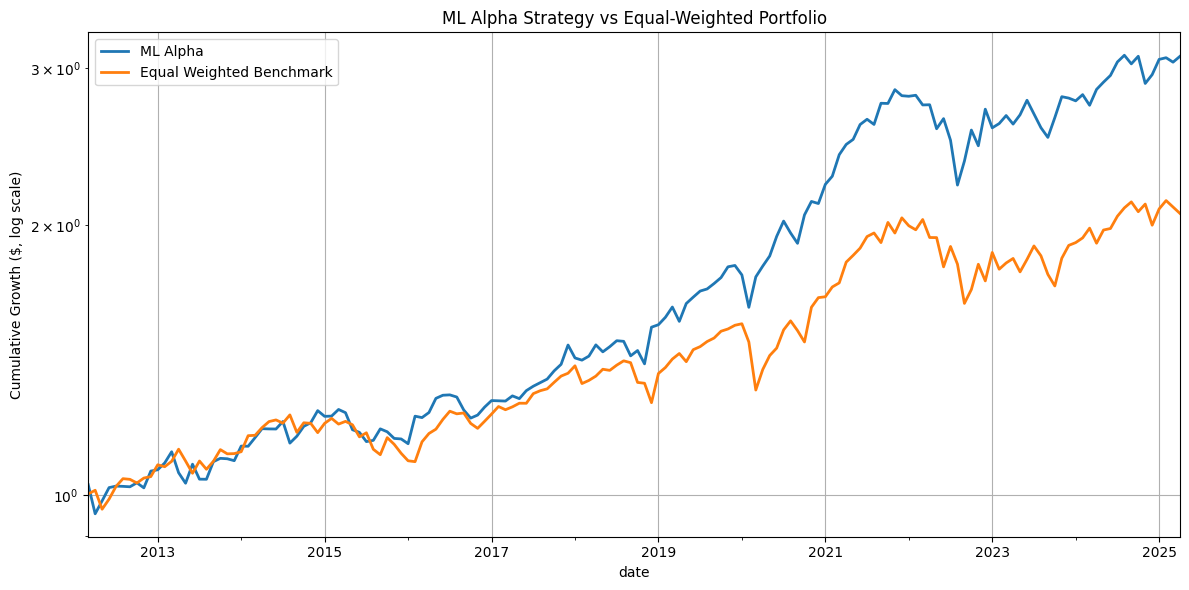

In [25]:
# STEP 0: Install required libraries
!pip install yfinance scikit-learn --quiet

# STEP 1: Imports
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# STEP 2: Download ETF price data
tickers = ['SPY', 'EFA', 'VNQ', 'TLT', 'DBC']
prices = yf.download(tickers, start="2005-01-01", interval='1mo', auto_adjust=True)['Close']
returns = prices.pct_change().dropna()

# STEP 3: Feature Engineering
def create_features(df, lags=[1, 3, 6, 9, 12]):
    frames = []
    for ticker in df.columns:
        temp = pd.DataFrame(index=df.index)
        temp['return'] = df[ticker]
        for lag in lags:
            temp[f'ret_{lag}'] = df[ticker].shift(lag)
        temp['vol_3m'] = df[ticker].rolling(3).std()
        temp['asset'] = ticker
        temp['future_return'] = df[ticker].shift(-1)
        frames.append(temp)
    return pd.concat(frames).dropna()

data = create_features(returns)

# STEP 4: Label Creation — 1 if outperforming next month
def add_labels(df):
    df = df.copy()
    df['label'] = 0
    for dt in df.index.unique():
        mask = df.index == dt
        if mask.sum() > 1:
            median = df.loc[mask, 'future_return'].median()
            df.loc[mask, 'label'] = (df.loc[mask, 'future_return'] > median).astype(int)
    return df

labeled_data = add_labels(data)

# STEP 5: Walk-Forward ML Training & Prediction
def walk_forward_predict(data, lookback=60):
    predictions = []
    data = data.sort_index()
    months = sorted(data.index.unique())

    for i in range(lookback, len(months) - 1):
        train_months = months[i - lookback:i]
        test_month = months[i]

        train = data[data.index.isin(train_months)]
        test = data[data.index == test_month]

        X_train = train.drop(columns=['return', 'future_return', 'asset', 'label'])
        y_train = train['label']
        X_test = test.drop(columns=['return', 'future_return', 'asset', 'label'])

        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
        model.fit(X_train_scaled, y_train)

        test = test.copy()
        test['alpha'] = model.predict_proba(X_test_scaled)[:, 1]
        predictions.append(test[['asset', 'alpha', 'future_return']])

    return pd.concat(predictions)

alpha_df = walk_forward_predict(labeled_data)

# STEP 6: Construct Top N Portfolio
def build_top_n_portfolio(alpha_df, top_n=3):
    alpha_df = alpha_df.copy()
    alpha_df['date'] = alpha_df.index
    grouped = alpha_df.groupby('date')
    top_selected = grouped.apply(lambda x: x.nlargest(top_n, 'alpha')).reset_index(drop=True)
    top_selected.set_index('date', inplace=True)
    portfolio_returns = top_selected.groupby('date')['future_return'].mean()
    return portfolio_returns

portfolio_returns = build_top_n_portfolio(alpha_df, top_n=3)

# STEP 7: Equal-Weighted Benchmark
equal_weighted = returns.mean(axis=1).reindex(portfolio_returns.index)

# STEP 8: Metrics Calculation
def calculate_metrics(returns):
    cumulative = (1 + returns).cumprod()
    cagr = cumulative.iloc[-1] ** (12 / len(returns)) - 1
    vol = returns.std() * np.sqrt(12)
    sharpe = (returns.mean() * 12) / (returns.std() * np.sqrt(12))
    drawdown = (cumulative / cumulative.cummax() - 1).min()
    win_ratio = (returns > 0).mean()
    return {
        "CAGR": cagr,
        "Volatility": vol,
        "Sharpe Ratio": sharpe,
        "Max Drawdown": drawdown,
        "Win Ratio": win_ratio
    }

ml_metrics = calculate_metrics(portfolio_returns)
benchmark_metrics = calculate_metrics(equal_weighted)

# STEP 9: Metrics Table
metrics_df = pd.DataFrame([ml_metrics, benchmark_metrics], index=['ML Alpha', 'Equal Weighted'])
metrics_df = metrics_df.applymap(lambda x: f"{x:.2%}" if isinstance(x, float) else x)
print("\nPerformance Metrics:\n")
display(metrics_df)

# STEP 10: Plot Performance
plt.figure(figsize=(12, 6))
(1 + portfolio_returns).cumprod().plot(label='ML Alpha', linewidth=2)
(1 + equal_weighted).cumprod().plot(label='Equal Weighted Benchmark', linewidth=2)
plt.yscale('log')
plt.title("ML Alpha Strategy vs Equal-Weighted Portfolio")
plt.ylabel("Cumulative Growth ($, log scale)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
